# AI TRAFFIC SIGNS RECOGNITION

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [2]:
data_dir = 'gtsrb'


IMG_HEIGHT = 40
IMG_WIDTH = 40

channels = 3

In [3]:
NUM_CATEGORIES = len(os.listdir(data_dir))
NUM_CATEGORIES

43

In [4]:

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

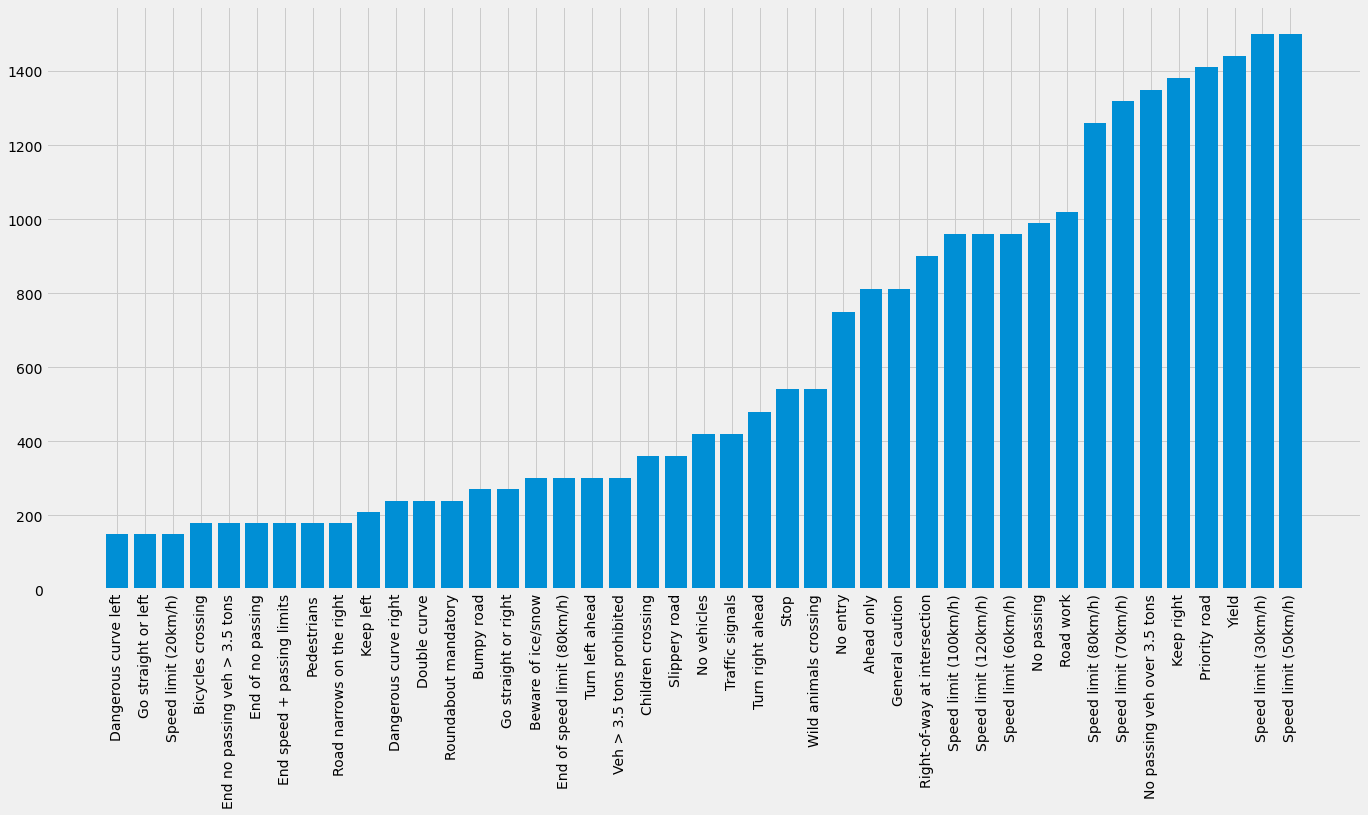

In [5]:
folders = os.listdir(data_dir)

data_number = []
class_num = []

for folder in folders:
    data_files = os.listdir(data_dir + '/' + folder)
    data_number.append(len(data_files))
    class_num.append(classes[int(folder)])
    

zipped_lists = zip(data_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
data_number, class_num = [ list(tuple) for tuple in  tuples]


plt.figure(figsize=(21,10))  
plt.bar(class_num, data_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [6]:

data = []
labels = []

for i in range(NUM_CATEGORIES):
    path = os.path.join(data_dir, str(i))
    print(f"in file {i}")
    images = os.listdir(path)

    for a in images:
        try:
            image = cv2.imread(path + '\\' + a)
            image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT), 3)
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

images = np.array(data)
labels = np.array(labels)

in file 0
in file 1
in file 2
in file 3
in file 4
in file 5
in file 6
in file 7
in file 8
in file 9
in file 10
in file 11
in file 12
in file 13
in file 14
in file 15
in file 16
in file 17
in file 18
in file 19
in file 20
in file 21
in file 22
in file 23
in file 24
in file 25
in file 26
in file 27
in file 28
in file 29
in file 30
in file 31
in file 32
in file 33
in file 34
in file 35
in file 36
in file 37
in file 38
in file 39
in file 40
in file 41
in file 42


In [7]:
print(images.shape)

(26640, 40, 40, 3)


In [8]:
TEST_SIZE = 0.1
Train_SIZE = 0.7
Validate_SIZE = 0.2
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
        np.array(images), np.array(labels), train_size=Train_SIZE+Validate_SIZE, test_size=TEST_SIZE, random_state=42
    )

In [9]:
X_trainn = x_train/255 
x_testt = x_test/255
print(labels[50])

print("X_train.shape", X_trainn.shape)
print("X_test.shape", x_testt.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X_train.shape (23975, 40, 40, 3)
X_test.shape (2664, 40, 40, 3)
y_train.shape (23975, 43)
y_test.shape (2664, 43)


In [10]:
def get_model(X_train):
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    # Building the model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))

    # Compilation of the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return  model

In [11]:

model = get_model(x_train)

In [12]:

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 36, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

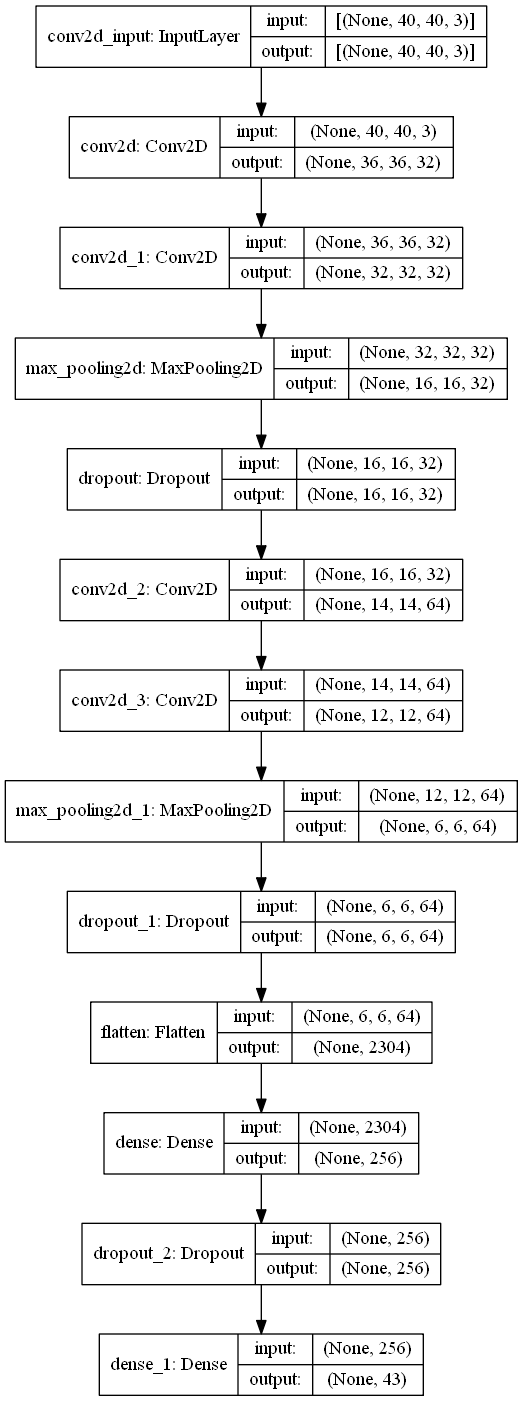

In [13]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
my_callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2),
        tf.keras.callbacks.ModelCheckpoint(filepath='Saved_model.h5'),
        tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    ]
EPOCHS = 15


# Fit model on training data
history =model.fit(x_train, y_train,batch_size=32, epochs=EPOCHS, validation_split=0.2, verbose=1, callbacks=my_callbacks)
# Save model to file
model.save("Saved_model.h5")

Epoch 1/15
600/600 [==============================] - 114s 187ms/step - loss: 4.2258 - accuracy: 0.2865 - val_loss: 0.4122 - val_accuracy: 0.9018
Epoch 2/15
600/600 [==============================] - 111s 184ms/step - loss: 0.6038 - accuracy: 0.8302 - val_loss: 0.1198 - val_accuracy: 0.9718
Epoch 3/15
600/600 [==============================] - 112s 186ms/step - loss: 0.3503 - accuracy: 0.9019 - val_loss: 0.1129 - val_accuracy: 0.9743
Epoch 4/15
600/600 [==============================] - 111s 185ms/step - loss: 0.2510 - accuracy: 0.9294 - val_loss: 0.1072 - val_accuracy: 0.9787
Epoch 5/15
600/600 [==============================] - 111s 185ms/step - loss: 0.2036 - accuracy: 0.9425 - val_loss: 0.0598 - val_accuracy: 0.9850
Epoch 6/15
600/600 [==============================] - 113s 188ms/step - loss: 0.2005 - accuracy: 0.9428 - val_loss: 0.0790 - val_accuracy: 0.9825
Epoch 7/15
600/600 [==============================] - 111s 184ms/step - loss: 0.1870 - accuracy: 0.9467 - val_loss: 0.0408 -

In [15]:
saved_model = load_model('Saved_model.h5')
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.993, Test: 0.986


In [16]:
labels = {'Speed limit (20km/h)',
               'Speed limit (30km/h)',
               'Speed limit (50km/h)',
               'Speed limit (60km/h)',
               'Speed limit (70km/h)',
               'Speed limit (80km/h)',
               'End of speed limit (80km/h)',
               'Speed limit (100km/h)',
               'Speed limit (120km/h)',
               'No passing',
               'No passing veh over 3.5 tons',
               'Right-of-way at intersection',
               'Priority road',
               'Yield',
               'Stop',
               'No vehicles',
               'Veh > 3.5 tons prohibited',
               'No entry',
               'General caution',
               'Dangerous curve left',
               'Dangerous curve right',
               'Double curve',
               'Bumpy road',
               'Slippery road',
               'Road narrows on the right',
               'Road work',
               'Traffic signals',
               'Pedestrians',
               'Children crossing',
               'Bicycles crossing',
               'Beware of ice/snow',
               'Wild animals crossing',
               'End speed + passing limits',
               'Turn right ahead',
               'Turn left ahead',
               'Ahead only',
               'Go straight or right',
               'Go straight or left',
               'Keep right',
               'Keep left',
               'Roundabout mandatory',
               'End of no passing',
               'End no passing veh > 3.5 tons'}
x_test = np.array(x_test)
pred = model.predict_classes(x_test)
print("[INFO] evaluating network...")
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1), target_names=labels))

C:\Users\CHETAN\anaconda3\envs\project\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[INFO] evaluating network...
                               precision    recall  f1-score   support

           Beware of ice/snow       1.00      1.00      1.00        10
              General caution       0.98      0.99      0.98       136
    Road narrows on the right       1.00      0.98      0.99       159
         Speed limit (30km/h)       0.98      1.00      0.99       101
   End speed + passing limits       1.00      0.99      1.00       125
                Slippery road       0.99      0.99      0.99       134
        Dangerous curve right       1.00      1.00      1.00        33
        Wild animals crossing       1.00      0.88      0.94        94
  End of speed limit (80km/h)       0.89      1.00      0.94        94
            End of no passing       0.99      1.00      1.00       109
    Veh > 3.5 tons prohibited       0.98      1.00      0.99       124
                  No vehicles       0.99      1.00      0.99        91
 Right-of-way at intersection       1.00      0

In [17]:
cm =confusion_matrix(np.argmax(y_test, axis=1), pred)

<AxesSubplot:>

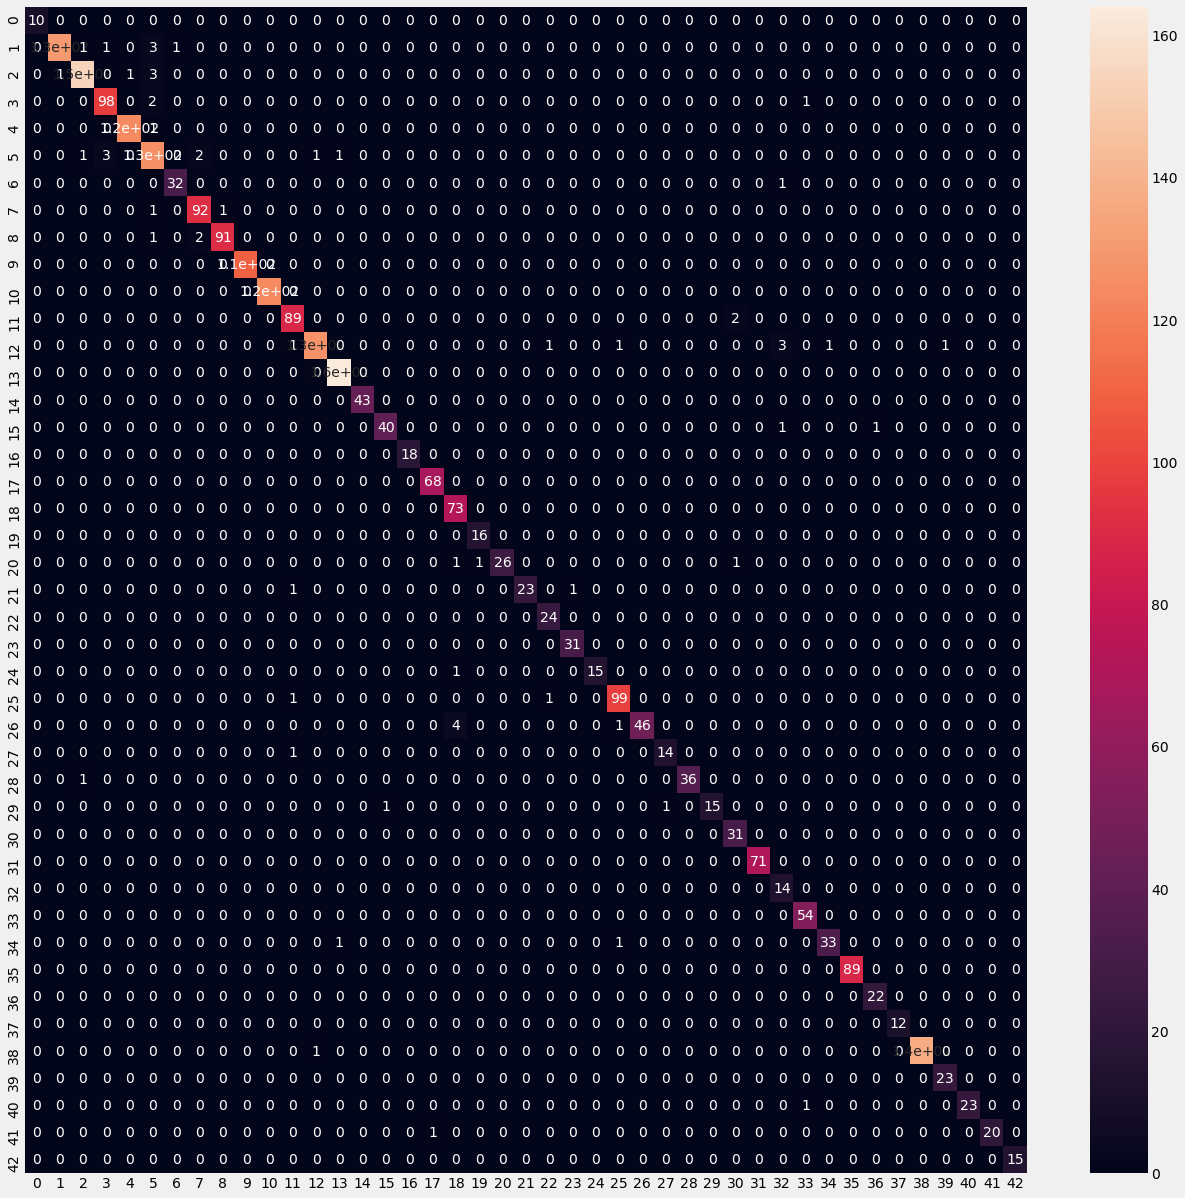

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(cm, annot=True)

## Predictions some images using GUI

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image



model = load_model('Saved_model.h5') # Path to your model


top=tk.Tk()

top.geometry('800x600')

top.title('Traffic sign classification')

top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))

sign_image = Label(top)



def Classify(file_path):
    print (file_path)
    
    
    global label_packed
    
    image = Image.open(file_path)
   
    image = image.resize((40,40))
    
    image = np.expand_dims(image, axis=0)
    
    image = np.array(image)
   
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
    

def show_Classify_button(file_path):
    
    classify_b=Button(top,text="Classify Image",command=lambda: Classify(file_path),padx=10,pady=5)
    
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    
    classify_b.place(relx=0.79,rely=0.46)
    

def upload_image():
    try:
       
        file_path=filedialog.askopenfilename()
        print(file_path)
        
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
    

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)

upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)

heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

In [21]:
 print(file_path)

NameError: name 'file_path' is not defined